### Bike Sharing Dataset 

In [4]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_profiling
import os

In [5]:
data_dir = os.getcwd().replace('/src', '/data')

In [6]:
os.listdir(data_dir)

['day.csv',
 'hour.csv',
 'neural_network.png',
 'pima-indians-diabetes.csv',
 'Readme.txt']

In [7]:
data_path = data_dir + '/hour.csv'
rides = pd.read_csv(data_path)
rides.head(5)

instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1

In [8]:
rides.describe()

instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165      2.005771      0.465431      0.639357      0.192556   
min        0.000000      0.000000      0.000000      1.000000      0.020000   
25%        0.000000      1.000000      0.000000      1.000000      0.340000   
50%        0.000000      3.000000      1.000000      1.000000      0.500000   
75%        0.000000      5.000000      1.000000      2.000000      0.660000   
max        1.000000      6.000000      1.000000      4.000000      1.000000   

              atemp           hum     windspeed        casual    registered  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.475775      0.627229      0.190098     35.676218    153.786869   
std        0.171850      0.192930      0.122340     49.305030    151.357286   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.333300      0.480000      0.104500      4.000000     34.000000   
50%        0.484800      0.630000      0.194000     17.000000    115.000000   
75%        0.621200      0.780000      0.253700     48.000000    220.000000   
max        1.000000      1.000000      0.850700    367.000000    886.000000   

                cnt  
count  17379.000000  
mean     189.463088  
std      181.387599  
min        1.000000  
25%       40.000000  
50%      142.000000  
75%      281.000000  
max      977.000000

In [9]:
rides.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [10]:
pandas_profiling.ProfileReport(rides)

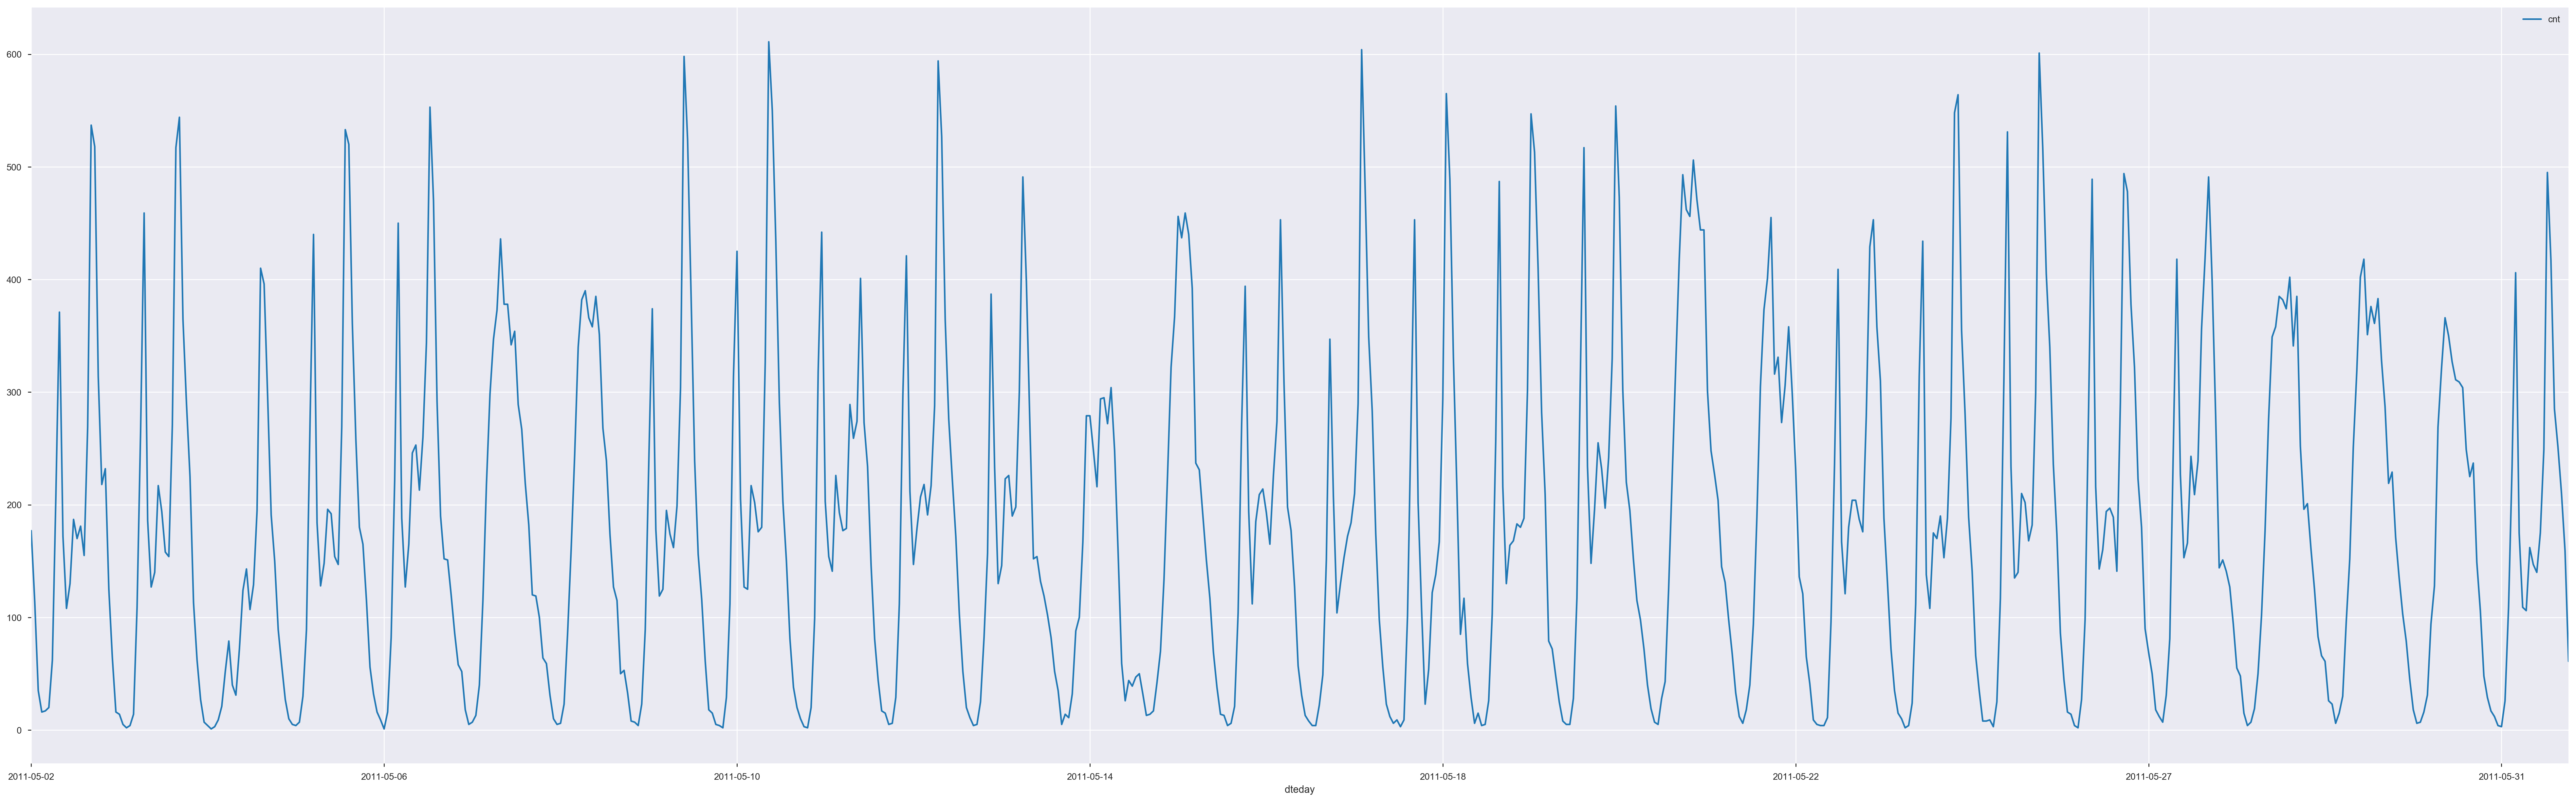

In [11]:
rides[('2011-05-01' < rides['dteday']) & (rides['dteday'] < '2011-06-01')].plot(x='dteday', y='cnt', figsize=(50,15))

In [12]:
# dummy variables #
dummy_fields = ['season', 'weathersit', 'mnth', 'hr', 'weekday']
for each in dummy_fields:
    dummies = pd.get_dummies(rides[each], prefix=each, drop_first=False)
    rides = pd.concat([rides, dummies], axis=1)

fields_to_drop = ['instant', 'dteday', 'season', 'weathersit', 
                  'weekday', 'atemp', 'mnth', 'workingday', 'hr']
data = rides.drop(fields_to_drop, axis=1)
data.head()

yr  holiday  temp   hum  windspeed  casual  registered  cnt  season_1  \
0   0        0  0.24  0.81        0.0       3          13   16         1   
1   0        0  0.22  0.80        0.0       8          32   40         1   
2   0        0  0.22  0.80        0.0       5          27   32         1   
3   0        0  0.24  0.75        0.0       3          10   13         1   
4   0        0  0.24  0.75        0.0       0           1    1         1   

   season_2    ...      hr_21  hr_22  hr_23  weekday_0  weekday_1  weekday_2  \
0         0    ...          0      0      0          0          0          0   
1         0    ...          0      0      0          0          0          0   
2         0    ...          0      0      0          0          0          0   
3         0    ...          0      0      0          0          0          0   
4         0    ...          0      0      0          0          0          0   

   weekday_3  weekday_4  weekday_5  weekday_6  
0          0          0          0          1  
1          0          0          0          1  
2          0          0          0          1  
3          0          0          0          1  
4          0          0          0          1  

[5 rows x 59 columns]

In [13]:
# Variable Scaling
quant_features = ['casual', 'registered', 'cnt', 'temp', 'hum', 'windspeed']
# Store scalings in a dictionary so we can convert back later
scaled_features = {}
for each in quant_features:
    mean, std = data[each].mean(), data[each].std()
    scaled_features[each] = [mean, std]
    data.loc[:, each] = (data[each] - mean)/std

In [14]:
# split training, validation, testing
# Save data for approximately the last 21 days 
test_data = data[-21*24:]

# Now remove the test data from the data set 
data = data[:-21*24]

# Separate the data into features and targets
target_fields = ['cnt', 'casual', 'registered']
target = ['cnt']
#target_drop = [item for item in target_fields if item not in target]

features, targets = data.drop(target_fields, axis=1), data[target].values.ravel()
test_features, test_targets = test_data.drop(target, axis=1), test_data[target]

# Hold out the last 60 days or so of the remaining data as a validation set
train_features, train_targets = features[:-60*24], targets[:-60*24]
val_features, val_targets = features[-60*24:], targets[-60*24:]

In [15]:
# Load libraries
#from sklearn.preprocessing import StandardScaler
#from sklearn.dummy import DummyClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
#from sklearn.svm import SVR
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

/Users/yangcong/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [16]:
# Test options and evaluation metric
num_folds = 10
seed = 27
scoring = 'neg_mean_squared_error'

# Spot-Check Algorithms
models = []
models.append(('Dummy', DummyRegressor(strategy='median')))
models.append(('KNN', KNeighborsRegressor(n_neighbors=5)))
models.append(('DT', DecisionTreeRegressor()))
models.append(('RF', RandomForestRegressor()))
models.append(('ET', ExtraTreesRegressor()))
models.append(('GB', GradientBoostingRegressor()))
models.append(('AdaBoost', AdaBoostRegressor()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
#models.append(('NB', GaussianNB()))
models.append(('XGB', XGBRegressor()))

In [53]:
# evaluate each model in turn
results = []
names = []
kfold = KFold(n_splits=num_folds, random_state=seed)
for name, model in models:
    cv_results = cross_val_score(model, train_features, train_targets, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

Dummy: -1.077452 (0.750728)
KNN: -0.436448 (0.169843)
DT: -0.259783 (0.077738)
RF: -0.156540 (0.065620)
ET: -0.124203 (0.050404)
GB: -0.257228 (0.153953)
AdaBoost: -0.631794 (0.242000)
LASSO: -1.007852 (0.561186)
EN: -1.007852 (0.561186)
XGB: -0.256058 (0.156890)


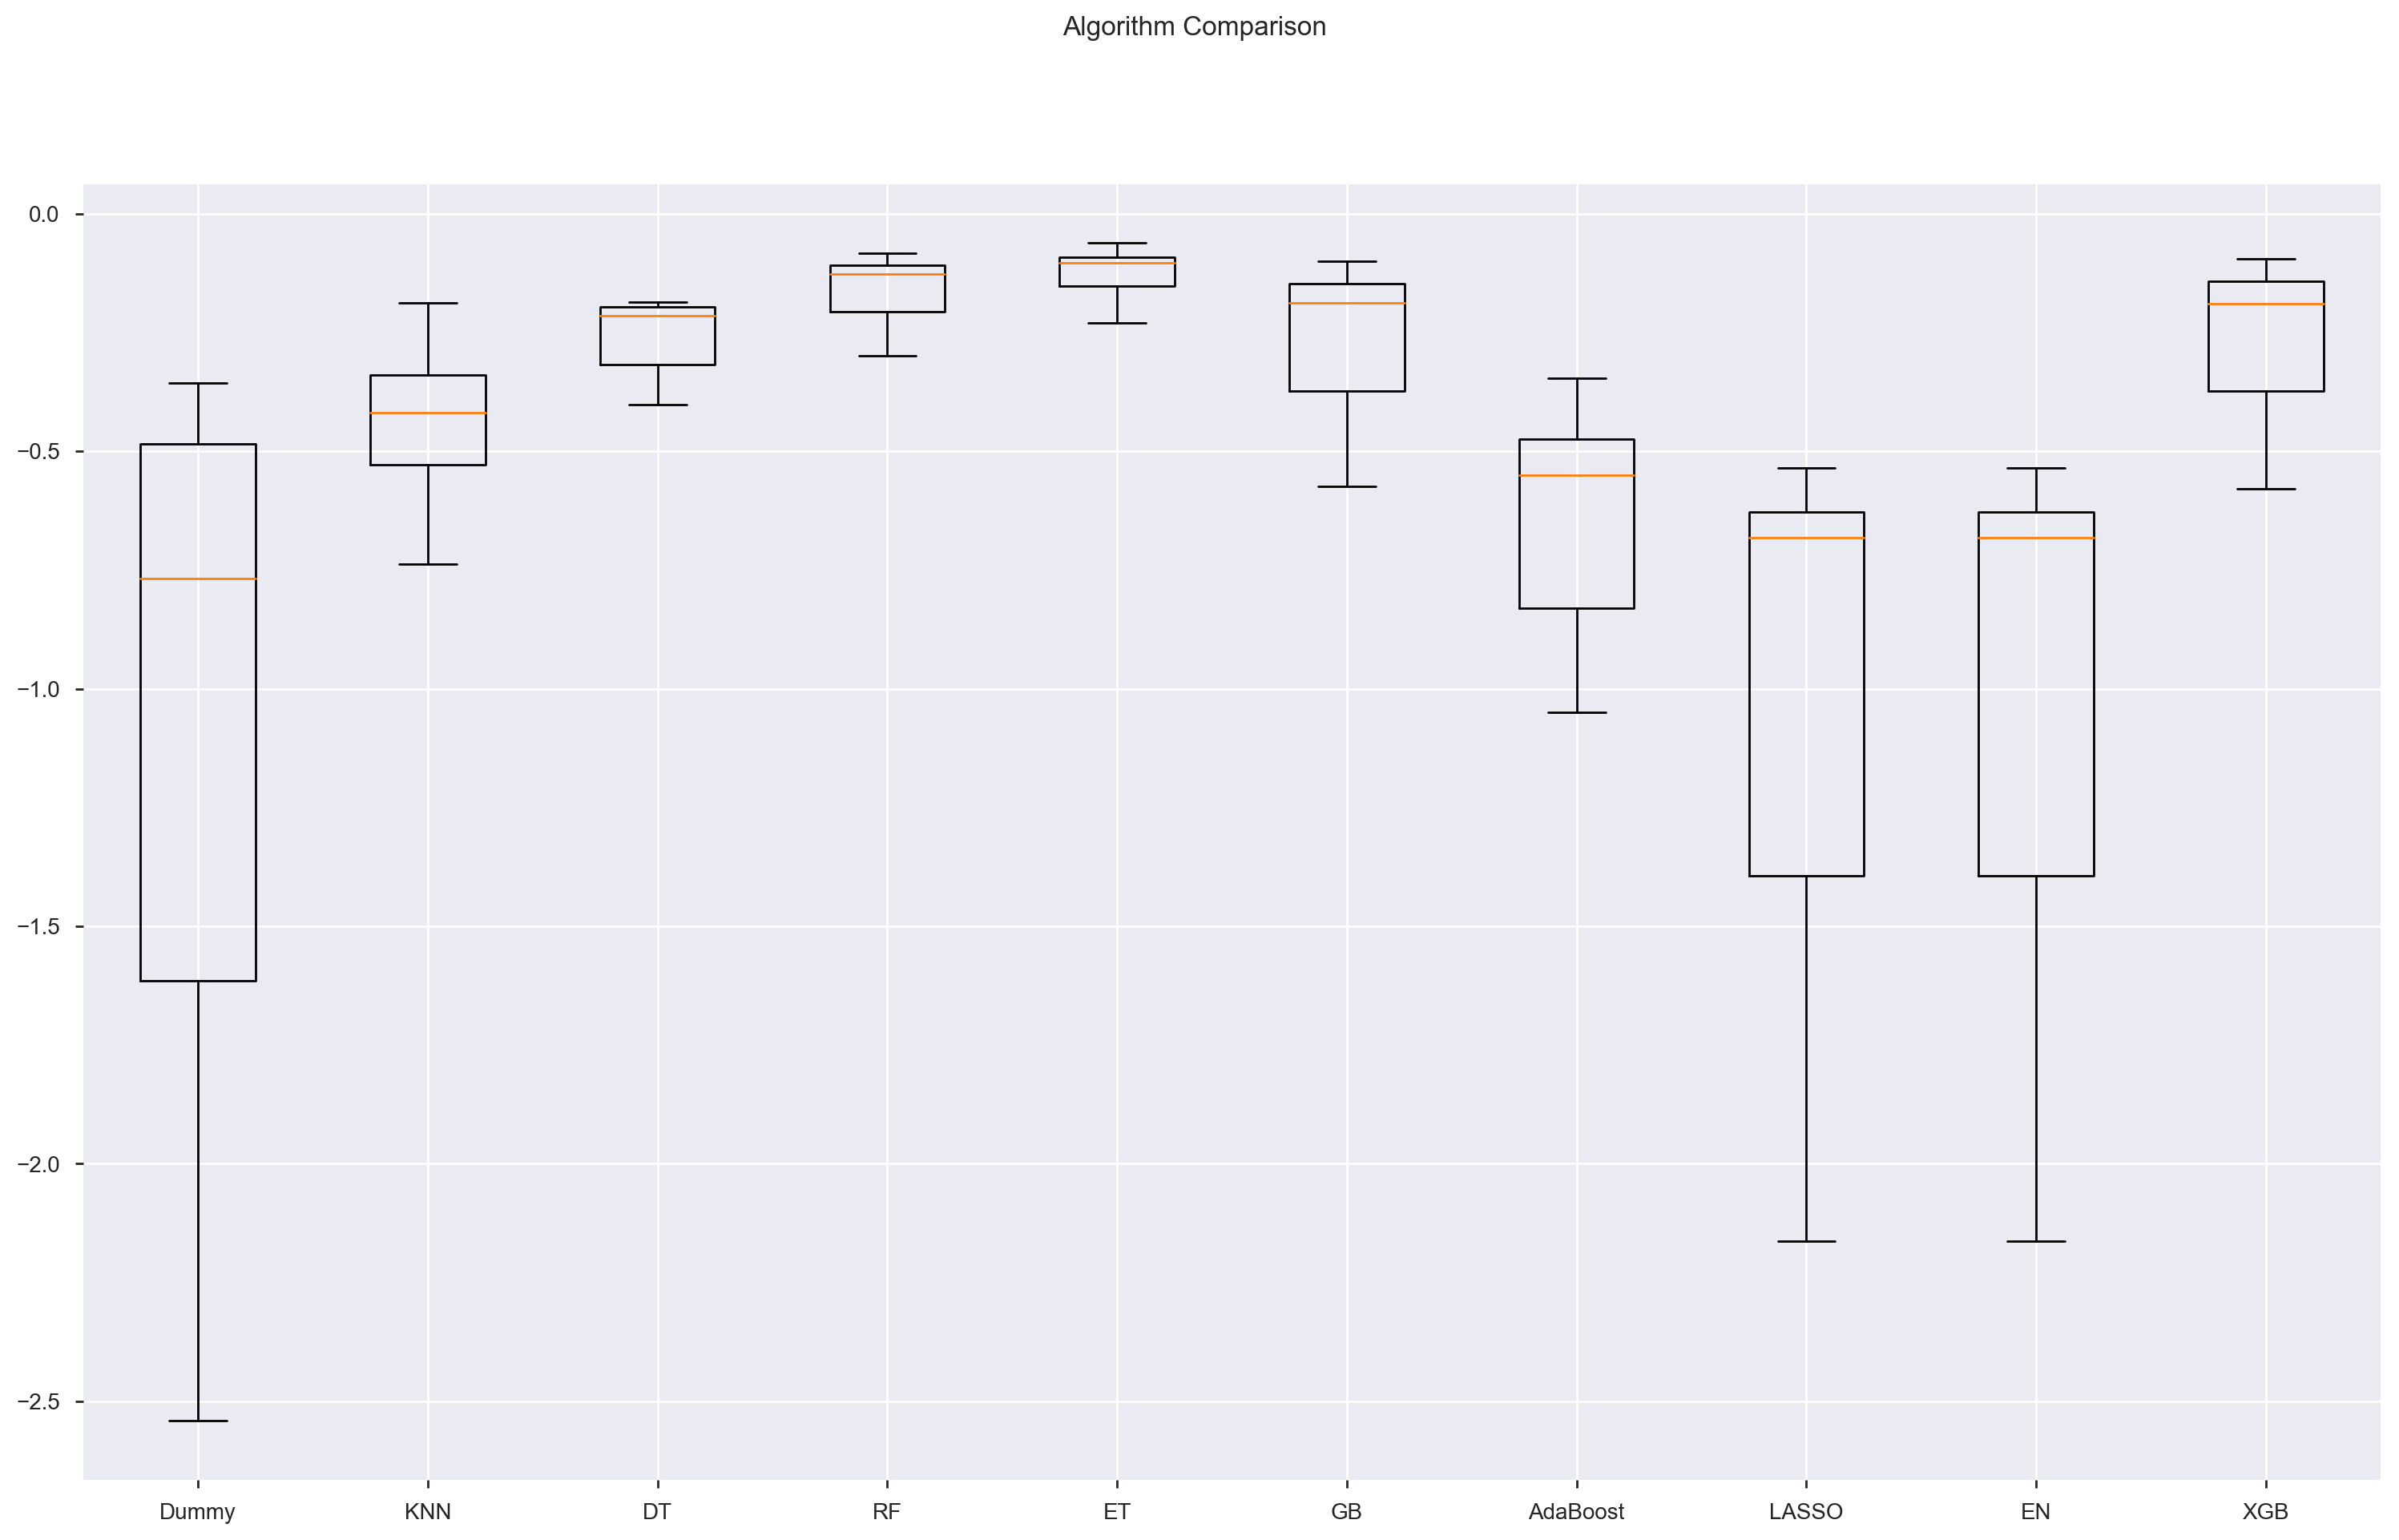

In [54]:
# Compare Algorithms
from matplotlib import pyplot

fig = pyplot.figure()
fig.set_size_inches(18.5, 10.5)
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

### with hyper-parameter tune ###

In [106]:
parameters = {}
parameters['KNN'] = {'n_neighbors': [5, 10]}
parameters['DT'] = {'max_depth':[None, 2, 5, 10]}
parameters['RF'] = {'n_estimators': [5, 10, 15, 20]}
parameters['LASSO'] = {'alpha' : [1.0, 0.8, 0.6, 0.4, 0.2, 0]}
parameters['XGB'] = {'n_estimators' : [50, 100, 150, 200], 
                    'max_depth' : [2, 4, 6, 8]}

In [109]:
# evaluate each model with hyper-parameter tuning
from sklearn.model_selection import GridSearchCV

results = []
names = []
kfold = KFold(n_splits=num_folds, random_state=seed)
for name, model in models:
    if name in parameters.keys():
        model_tune = GridSearchCV(model, parameters[name])
        model_tune.fit(train_features, train_targets)
        model_select = model_tune.best_estimator_  #model(**model_tune.best_params_)
    else:
        model_select = model
    cv_results = cross_val_score(model_select, train_features, train_targets, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

Dummy: -1.077452 (0.750728)
KNN: -0.456036 (0.203755)
DT: -0.259979 (0.072440)
RF: -0.151497 (0.061009)
ET: -0.126152 (0.052627)
GB: -0.257228 (0.153953)
AdaBoost: -0.638304 (0.249590)


/Users/yangcong/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/Users/yangcong/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
/Users/yangcong/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/yangcong/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_tr

/Users/yangcong/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/yangcong/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/Users/yangcong/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
/Users/yangcong/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha 

LASSO: -0.329747 (0.156642)
EN: -1.007852 (0.561186)
XGB: -0.101324 (0.049687)


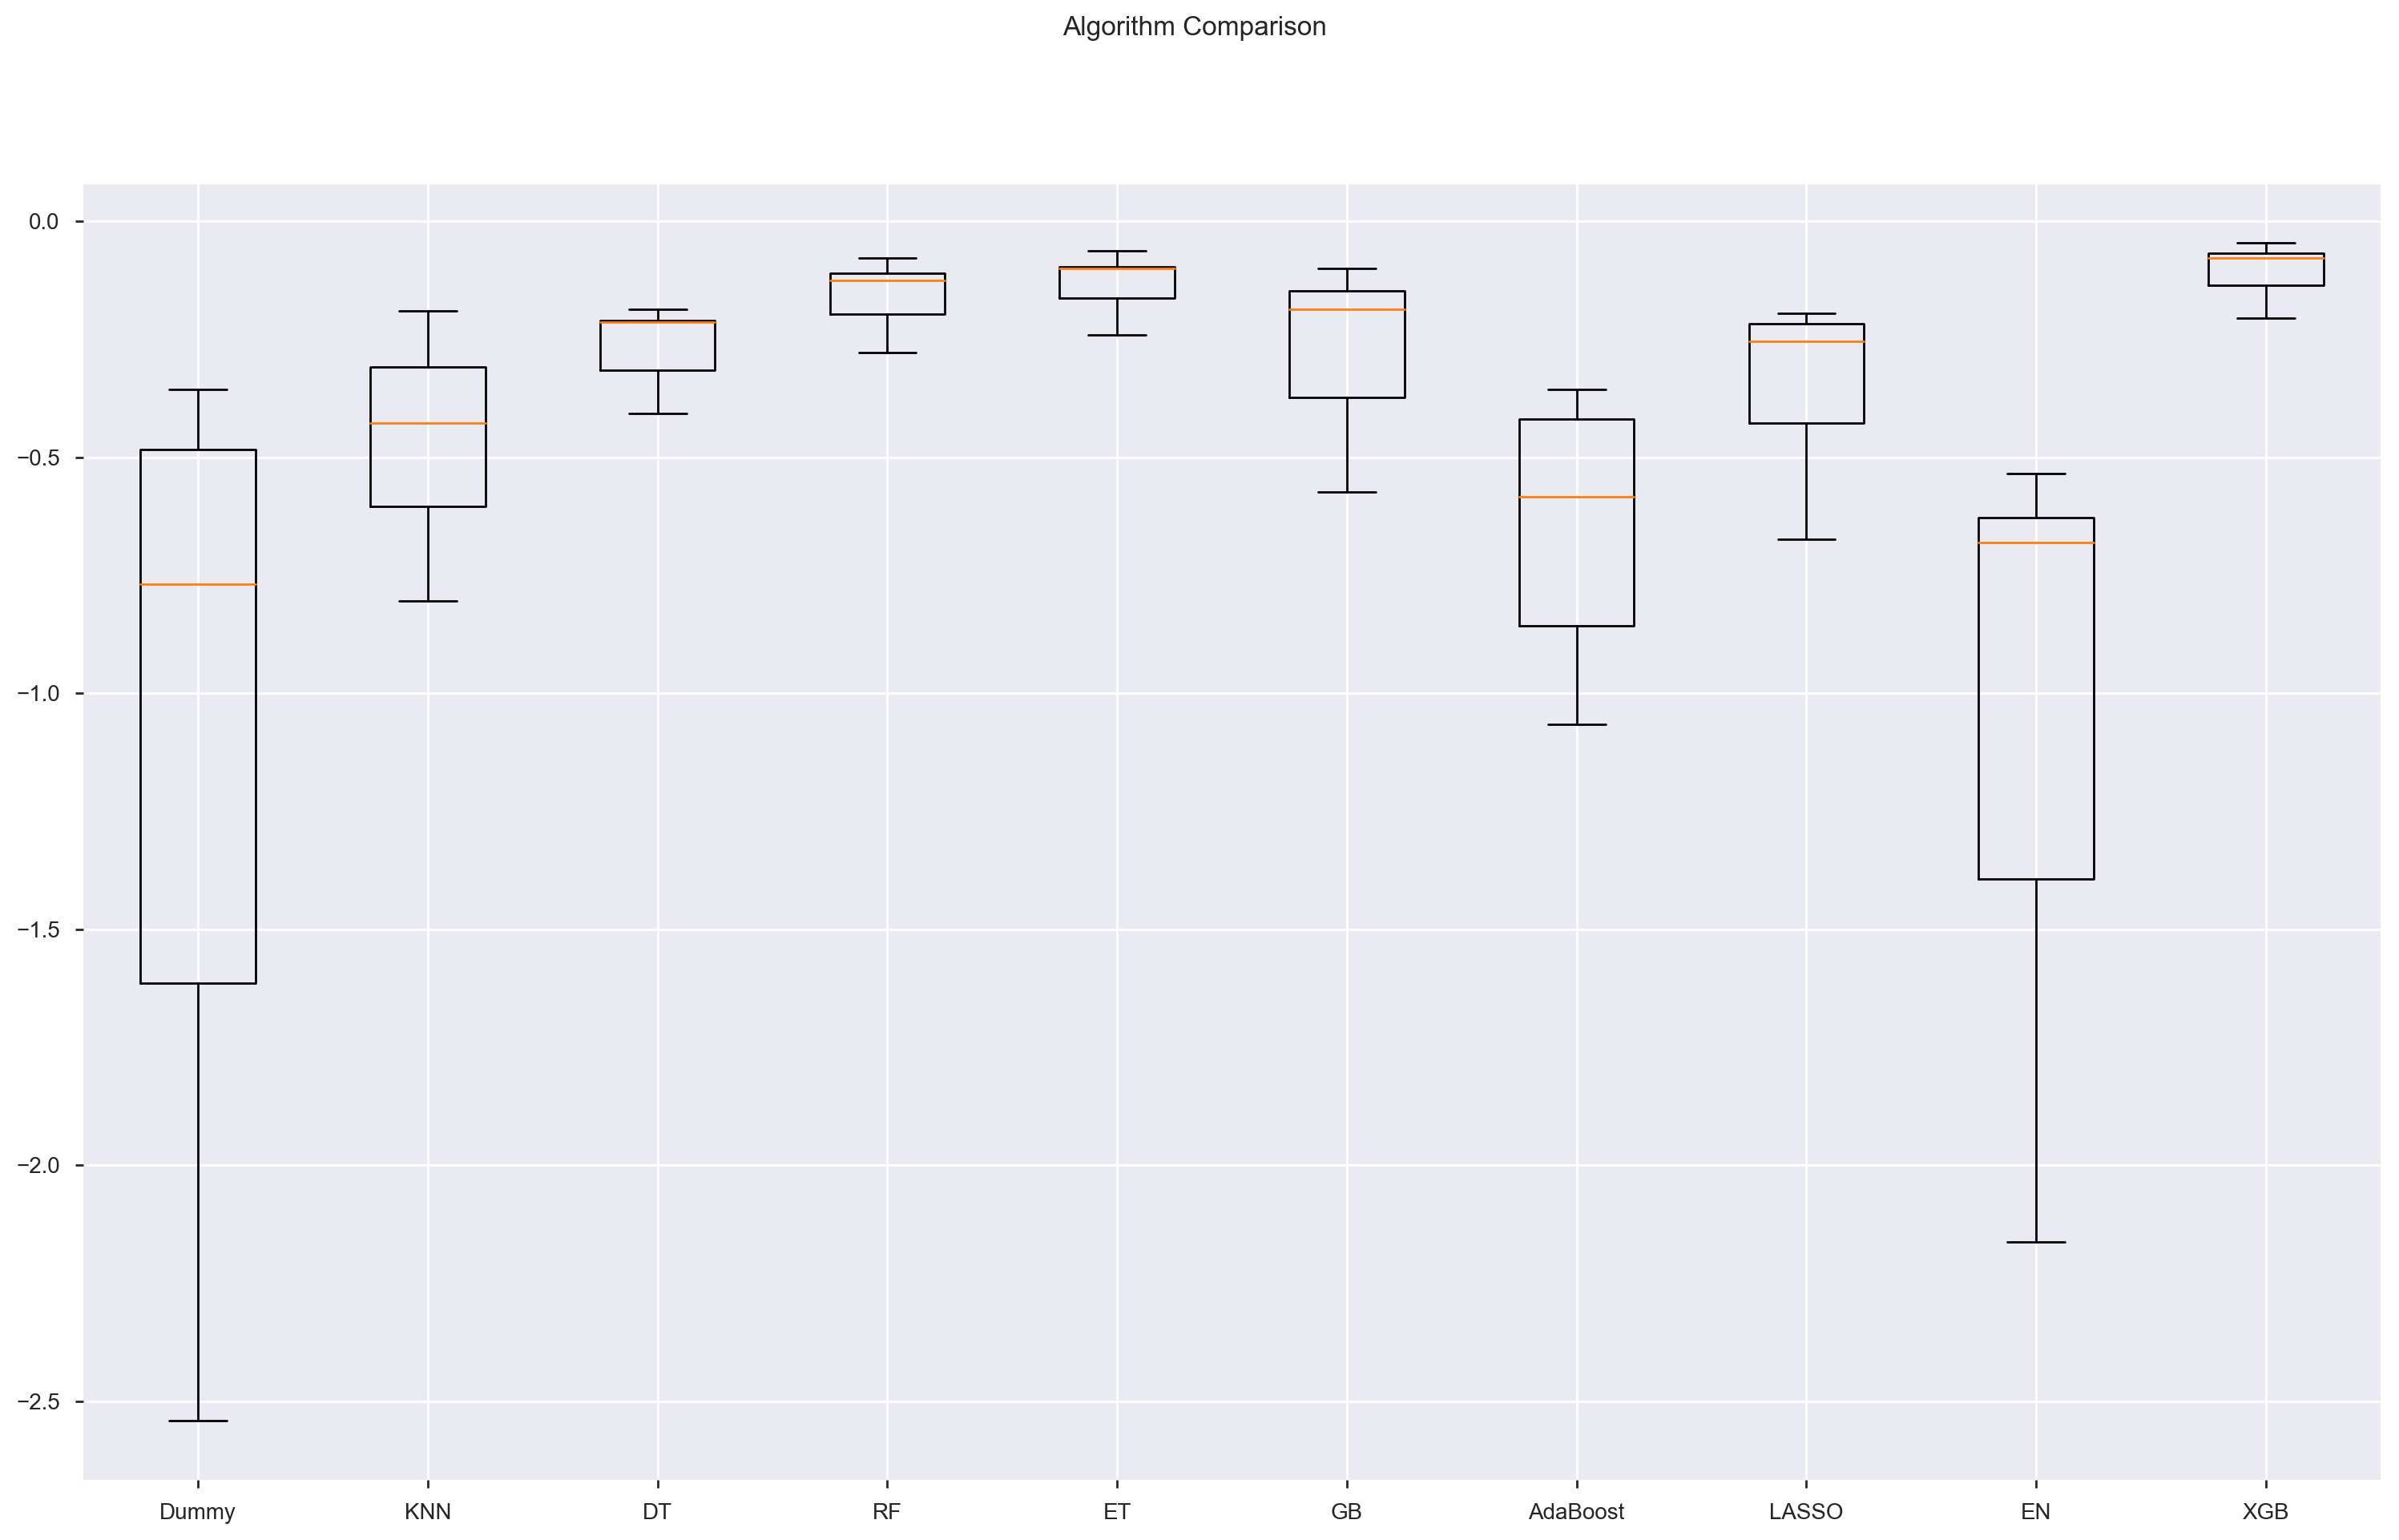

In [111]:
# Compare Algorithms
from matplotlib import pyplot

fig = pyplot.figure()
fig.set_size_inches(18.5, 10.5)
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [104]:
#https://mlwave.com/kaggle-ensembling-guide/   